In [ ]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.metrics import accuracy
import tensorflow as tf



In [ ]:
df_Plant1_Generation = pd.read_csv("Plant_1_Generation_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
#df_Plant2_Generation = pd.read_csv("Plant_2_Generation_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
df_Plant1_Weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')
#df_Plant2_Weather = pd.read_csv("Plant_2_Weather_Sensor_Data.csv", sep = ",",  low_memory = False , encoding = 'utf_8')

In [ ]:
df_Plant1_Generation.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)
#df_Plant2_Generation.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)
df_Plant1_Weather.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)
#df_Plant2_Weather.drop(['SOURCE_KEY','PLANT_ID'],axis = 1 , inplace = True)

In [ ]:
#Formato de fecha
df_Plant1_Generation['DATE_TIME']= pd.to_datetime(df_Plant1_Generation['DATE_TIME'])
df_Plant1_Weather['DATE_TIME']= pd.to_datetime(df_Plant1_Weather['DATE_TIME'])
#df_Plant2_Generation['DATE_TIME']= pd.to_datetime(df_Plant2_Generation['DATE_TIME'])
#df_Plant2_Weather['DATE_TIME']= pd.to_datetime(df_Plant2_Weather['DATE_TIME'])

In [ ]:
#Se unen los datasets de las 2 plantas
plant1 = pd.merge(df_Plant1_Generation, df_Plant1_Weather, how='inner', on = 'DATE_TIME')
#plant2 = pd.merge(df_Plant2_Generation, df_Plant2_Weather, how='inner', on = 'DATE_TIME')

In [ ]:
df_generation = plant1

In [ ]:
X = df_generation[['DATE_TIME','DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','IRRADIATION']].copy()
Y_AC = df_generation['AC_POWER'].copy()

In [ ]:
Y_AC = np.array(Y_AC)

In [ ]:
X = np.array(X)

In [ ]:
X[:,0]

array([Timestamp('2020-05-15 00:00:00'), Timestamp('2020-05-15 00:00:00'),
       Timestamp('2020-05-15 00:00:00'), ...,
       Timestamp('2020-06-17 23:45:00'), Timestamp('2020-06-17 23:45:00'),
       Timestamp('2020-06-17 23:45:00')], dtype=object)

In [ ]:
X = X.reshape(np.size(X,0),5)

In [ ]:
Y_AC = Y_AC.reshape(np.size(X,0),1) #Dolor

In [ ]:
cap1 = range(1, 5, 1)
cap2 = range(0, 5, 1)
total_iter = []

In [ ]:
scaler = StandardScaler()

In [ ]:
from tensorflow import keras

In [ ]:
from keras.layers import Dropout
from keras.layers.normalization.batch_normalization import BatchNormalization
model = Sequential()
model.add(Dense(6,input_shape = [4], activation= 'relu',kernel_initializer=keras.initializers.he_normal,kernel_regularizer=keras.regularizers.l2(0.00001)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(4,activation='relu',kernel_initializer=keras.initializers.he_normal,kernel_regularizer=keras.regularizers.l2(0.00001)))
model.add(Dense(1))

Errores = np.ones(5)
j = 0
kf = KFold(n_splits=5, shuffle = True)

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y_AC[train_index], Y_AC[test_index]
    data_time_test = X_test[:,0]
    X_train = np.delete(X_train,0,axis=1)
    X_test = np.delete(X_test,0,axis=1)
    
    X_train_n = scaler.fit_transform(X_train)
    X_test_n  = scaler.fit_transform(X_test)
    

    model.compile(loss='mean_absolute_error',
                optimizer= 'RMSprop' ,
              metrics=['mean_squared_error'])
    
    model.fit(X_train_n,y_train, epochs= 20, validation_split=0.1)
    y_pred_ac = model.predict(X_test_n)

    Errores[j] = mean_squared_error(y_test,y_pred_ac)
    j+=1

print("\nError de validación: " + str(np.mean(Errores)) + " +/- " + str(np.std(Errores)))

Epoch 1/20
1028/1028 [==============================] - 4s 2ms/step - loss: 319.5627 - mean_squared_error: 263840.0625 - val_loss: 227.5725 - val_mean_squared_error: 154843.1406
Epoch 2/20
1028/1028 [==============================] - 2s 2ms/step - loss: 291.1566 - mean_squared_error: 220944.4062 - val_loss: 176.3872 - val_mean_squared_error: 99053.7734
Epoch 3/20
1028/1028 [==============================] - 2s 2ms/step - loss: 192.4588 - mean_squared_error: 105706.7656 - val_loss: 62.1054 - val_mean_squared_error: 18055.3633
Epoch 4/20
1028/1028 [==============================] - 2s 2ms/step - loss: 97.0955 - mean_squared_error: 26885.2227 - val_loss: 21.6410 - val_mean_squared_error: 2269.2124
Epoch 5/20
1028/1028 [==============================] - 2s 2ms/step - loss: 78.8689 - mean_squared_error: 18465.2324 - val_loss: 19.1794 - val_mean_squared_error: 1760.6964
Epoch 6/20
1028/1028 [==============================] - 2s 2ms/step - loss: 77.5350 - mean_squared_error: 18530.9629 - val_

In [ ]:
data_time_test.shape

(9136,)

In [ ]:
data_time_test = data_time_test.reshape(data_time_test.shape[0],1)

In [ ]:
data_time_test[0].shape

(1,)

In [ ]:
data_time_test.shape

(9136, 1)

In [ ]:
y_test.shape

(9136, 1)

In [ ]:
y_pred_ac.shape

(9136, 1)

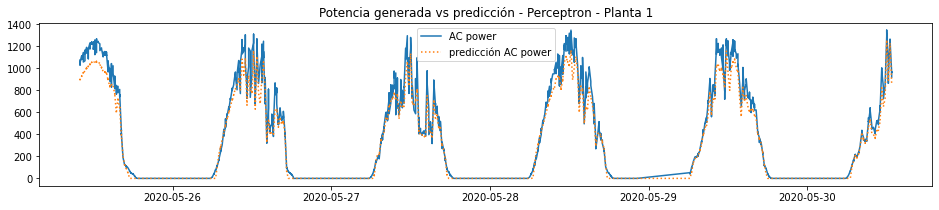

In [ ]:
plt.figure(figsize=(16,3))
plt.plot(data_time_test[4000:6000],y_test[4000:6000],label='AC power')
plt.plot(data_time_test[4000:6000],y_pred_ac[4000:6000],label="predicción AC power", linestyle = ':')
plt.legend(loc='best')
plt.title("Potencia generada vs predicción - Perceptron - Planta 1")
plt.show()

In [ ]:
X.shape

(113378, 5)